<a href="https://colab.research.google.com/github/ShounakDas101/multibody/blob/main/flip_mind_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [100]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.3
b=0.5
c=1.0

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 5+KE

In [101]:
# Mind Potential Equation biased because of  various brands in the market
t = np.arange(-np.pi/2,np.pi/2,0.05)   # start,stop,step
t_max=np.pi/2
H0 = U - a*(1-np.cos(t))
H1 = U - a*(1-np.cos(t))- f*a*(1-np.cos(t)*np.cos(N*t))
H2 = U - a*(1-np.cos(t))- f*a*(1-np.cos(t)*np.cos(N*t))- b*(t_max-abs(t))
H3 = U - a*(1-np.cos(t))- f*a*(1-np.cos(t)*np.cos(N*t))- b*(t_max-abs(t)) - c*np.cos(t)
y0 = -H0
y1 = -H1
y2 = -H2
y3 = -H3

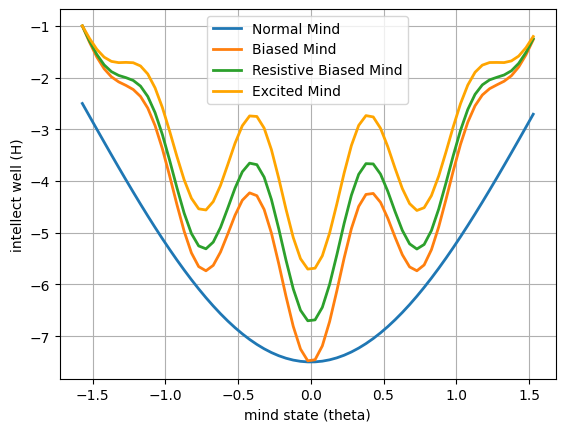

In [129]:
# A plot of the fluid height (position) inside the straw as a function of time.
#plt.plot(t,y)
# plt.show()
plt.plot(t, y0, t, y1, t, y2, t, y3, 'orange', linewidth = 2)
plt.xlabel('mind state (theta)')
plt.ylabel('intellect well (H)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(['Normal Mind', 'Biased Mind', 'Resistive Biased Mind', 'Excited Mind'])
plt.grid(True)

In [132]:
def coupled_osc(x, v):
    return  [x[1], -2*a*np.sin(x[0]) -b*x[1] -f*a*np.sin(x[0])*np.cos(N*x[0]) - f*a*np.cos(x[0])*np.sin(N*x[0])-c*np.sin(x[0])]

In [133]:
# Next, we create an array of the desired times for the solution.
time = np.arange(0, 30, 1e-2)

In [135]:
#    position, velocity = odeint(coupled_osc, [3e-3, 0], time).T
#else:
position, velocity = odeint(coupled_osc, [2e-3, 0], time).T

ValueError: ignored

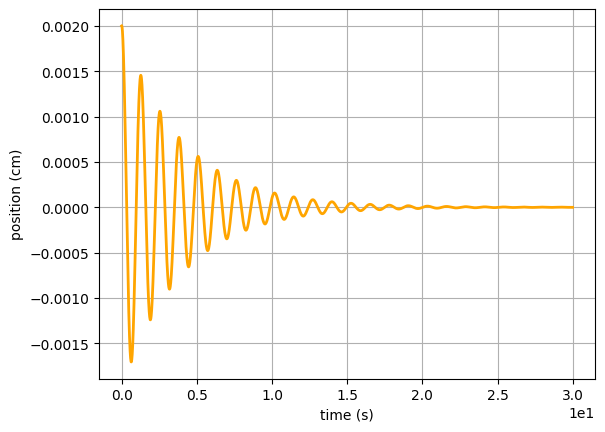

In [121]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time, position, 'orange', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('position (cm)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)

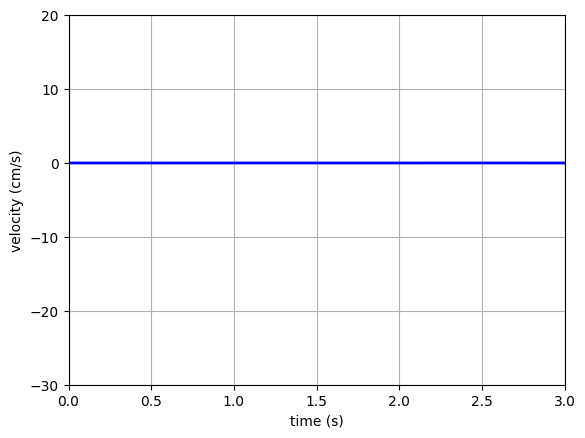

In [108]:
# A plot of the fluid velcoity as a function of time.
plt.plot(time, velocity, 'blue', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('velocity (cm/s)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.axis((0, 3, -30, 20));

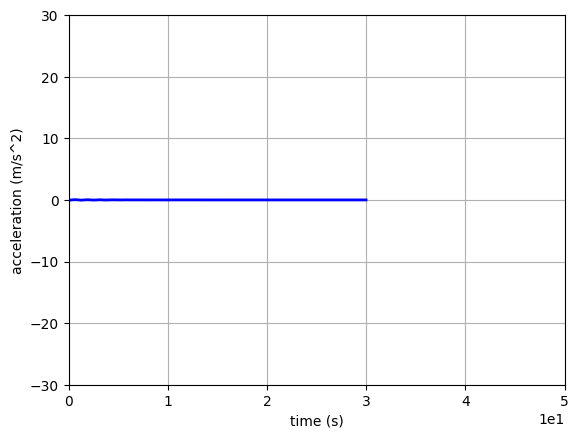

In [109]:
# acceleration vs. time
_, a = coupled_osc([position, velocity], time)
plt.plot(time, a, 'blue', linewidth = 2)
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)
plt.axis((0, 50, -30, 30));
